<a name='1'></a>
# 1 - Packages

First import all the packages that you will need during this assignment.


In [2]:
# Package imports
import io
from google.colab import files
import pandas as pd
import numpy as np
from scipy import stats



import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import sklearn.linear_model


<a name='2'></a>
# 2 - Load the Dataset 



In [3]:
uploaded = files.upload()

Saving data.csv to data.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))   #load csv file into Pandas Dataframe
print(df)

           col_0  col_1     col_2  col_3     col_4     col_5     col_6  \
0       0.860224    1.0  0.905699    0.0  0.000000  0.897801  0.416134   
1       0.899660    0.0  0.950384    0.0  0.000000  0.899660  0.814271   
2       0.604478    0.0  0.901425    0.0  0.544263  0.816494  0.542276   
3       0.786914    0.0  0.874471    0.0  0.000000  0.767869  0.792423   
4       0.485634    1.0  0.909619    0.5  0.000000  0.499489  1.000000   
...          ...    ...       ...    ...       ...       ...       ...   
280999  1.032293    0.0  0.627504    0.0 -0.934179  1.193713 -0.194791   
281000  0.555958    0.0  0.686127    0.0  1.102023  0.346999 -0.271032   
281001  0.515235    0.0  0.672777    0.0  1.257941  1.193937  1.551960   
281002  0.497795    0.0  1.147425    0.0 -0.724074  0.334741  1.795984   
281003  1.071413    0.0  0.629556    0.0  1.317902  0.409869 -0.201267   

           col_7     col_8     col_9      col_10    col_11    col_12  \
0       0.936249  0.954516  0.655994   

In [5]:
df.shape

(281004, 15)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
col_0,281004.0,0.786245,0.089018,-0.063343,0.738787,0.796567,0.846311,1.112313
col_1,281004.0,0.085977,0.280331,0.000000,0.000000,0.000000,0.000000,1.000000
col_2,281004.0,0.892915,0.083577,0.427709,0.848364,0.908683,0.953914,1.214537
col_3,281004.0,0.132527,0.323653,0.000000,0.000000,0.000000,0.000000,1.000000
col_4,281004.0,0.195575,0.303187,-1.075384,0.000000,0.000000,0.434253,1.505117
col_5,281004.0,0.773967,0.125954,-0.079069,0.705784,0.789394,0.859719,1.240419
col_6,281004.0,0.653034,0.248056,-0.488159,0.464633,0.626251,0.849837,1.799994
col_7,281004.0,0.884875,0.072949,0.128208,0.857066,0.903768,0.932482,1.119058
col_8,281004.0,0.861789,0.190076,0.000000,0.856616,0.912699,0.945720,1.166633
col_9,281004.0,0.863303,0.171181,-0.152368,0.774144,0.922107,0.998507,1.559296


 col_10 may has outliers 
lable 1/0  for classification

In [7]:
z = np.abs(stats.zscore(df['col_10']))   # z-score
print(z)

0         0.168295
1         0.335590
2         0.701820
3         1.131603
4         0.869115
            ...   
280999    2.229869
281000    1.945757
281001    1.658851
281002    1.957874
281003    2.367551
Name: col_10, Length: 281004, dtype: float64


In [8]:
print(np.where(z > 3))  #outlier output in sample index

(array([    13,     42,    105, ..., 278823, 278912, 278934]),)


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281004 entries, 0 to 281003
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   col_0   281004 non-null  float64
 1   col_1   281004 non-null  float64
 2   col_2   281004 non-null  float64
 3   col_3   281004 non-null  float64
 4   col_4   281004 non-null  float64
 5   col_5   281004 non-null  float64
 6   col_6   281004 non-null  float64
 7   col_7   281004 non-null  float64
 8   col_8   281004 non-null  float64
 9   col_9   281004 non-null  float64
 10  col_10  281004 non-null  float64
 11  col_11  281004 non-null  float64
 12  col_12  281004 non-null  float64
 13  col_13  281004 non-null  float64
 14  label   281004 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 32.2 MB
None


<Axes: >

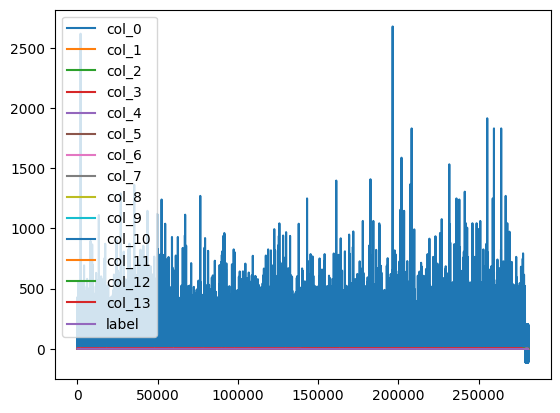

In [10]:
df.plot()

col_10 has very large value

<Axes: xlabel='col_10', ylabel='label'>

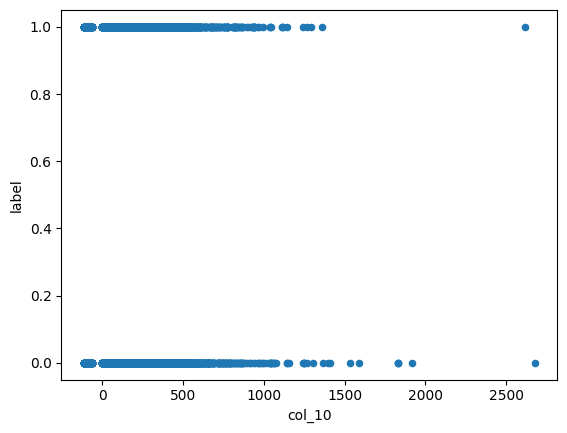

In [11]:
df.plot(kind = 'scatter', x = 'col_10', y = 'label')

In [ ]:
df.corr()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,label
col_0,1.000000,0.040469,0.499647,0.151903,0.046310,0.642007,0.299636,0.434798,0.217155,0.114761,0.107559,0.277046,0.279631,0.453301,0.190756
col_1,0.040469,1.000000,0.046406,0.079511,0.002437,0.008861,0.108816,-0.027922,0.016628,0.041394,0.005318,0.025726,0.103681,-0.014085,0.178260
col_2,0.499647,0.046406,1.000000,0.222044,0.058239,0.568479,0.445672,0.219785,0.290209,0.182706,0.025992,0.373454,0.417796,0.169940,0.238474
col_3,0.151903,0.079511,0.222044,1.000000,0.038207,0.077641,0.545423,-0.089755,0.105161,0.259020,-0.014538,0.144650,0.539522,-0.032801,0.280728
col_4,0.046310,0.002437,0.058239,0.038207,1.000000,0.024474,0.054736,0.000401,0.212565,0.019620,-0.006474,0.171207,0.055928,0.014063,0.041079
col_5,0.642007,0.008861,0.568479,0.077641,0.024474,1.000000,0.204174,0.682686,0.157311,0.044801,0.065796,0.202170,0.186625,0.324814,0.081403
col_6,0.299636,0.108816,0.445672,0.545423,0.054736,0.204174,1.000000,-0.053514,0.221874,0.391137,-0.012822,0.288858,0.796271,-0.004921,0.399639
col_7,0.434798,-0.027922,0.219785,-0.089755,0.000401,0.682686,-0.053514,1.000000,0.041114,-0.045322,0.071199,0.034095,-0.064500,0.311038,-0.075189
col_8,0.217155,0.016628,0.290209,0.105161,0.212565,0.157311,0.221874,0.041114,1.000000,0.118845,0.017504,0.768437,0.222909,0.068491,0.110710
col_9,0.114761,0.041394,0.182706,0.259020,0.019620,0.044801,0.391137,-0.045322,0.118845,1.000000,-0.030230,0.132720,0.381831,-0.042064,0.207069


col_6 and col_12 got a 0.792671  correlation.

col_8 and col_11 got a 0.768437 correlation


In [17]:
#X_col=['col_0','col_1','col_2','col_3','col_4','col_5','col_6','col_7','col_8','col_9','col_10','col_11','col_12','col_13']
#X_col=['col_0','col_1','col_2','col_3','col_4','col_5','col_6','col_7','col_8','col_9','col_10']
X_col=['col_0','col_1','col_2','col_3','col_4','col_5','col_6','col_7','col_8','col_9']   # col_10 maybe is a output

X=df[X_col]
Y=df['label']

In [18]:
print(X.shape)
print(Y.shape)

(281004, 10)
(281004,)


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [26]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(210753, 10)
(210753,)
(70251, 10)
(70251,)


<a name='3'></a>
## 3 - Simple Logistic Regression

Before building a full neural network, let's check how logistic regression performs on this problem.  use sklearn's built-in functions for this. Run the code below to train a logistic regression classifier on the dataset.

In [32]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegression(solver = 'lbfgs')
clf.fit(x_train,y_train)

LogisticRegression()

prediction




In [36]:
predictions=clf.predict(x_train)
print(score)

0.6977551920969096


In [33]:
predictions = clf.predict(x_test)

In [34]:
score =clf.score(x_test, y_test)
print(score)

0.6977551920969096


**Interpretation**: The dataset is not linearly separable, so logistic regression doesn't perform well, and shows high bias.  Hopefully a neural network will do better. 


**4 Neural Network model**


Logistic regression didn't work well on the dataset. Next,  Try to train a Neural Network with a single hidden layer and see how that handles the same problem.
